<a href="https://colab.research.google.com/github/JoaoJuniorGrb/FAI_CRG/blob/main/regess%C3%A3o_com_estimators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

base = pd.read_csv('house_prices.csv')
#base.head()

x = base.iloc[:,5:6].values
y = base.iloc[:,2:3].values


scaler_y = StandardScaler()
scaler_x = StandardScaler()

x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)


# Divisão em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

# Modelo Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Compilação
model.compile(optimizer='sgd', loss='mean_squared_error')

# Treinamento
model.fit(x_treino, y_treino, epochs=200)

# Avaliação
loss = model.evaluate(x_teste, y_teste)
print(f'Perda (Loss): {loss}')

# Predições
y_pred = model.predict(x_teste)
print(f'Predições: {y_pred.flatten()}')

# Reverter a padronização para valores originais
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_teste)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.5771
Epoch 2/200
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - loss: 0.5316
Epoch 3/200
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - loss: 0.5355
Epoch 4/200
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5261
Epoch 5/200
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5298
Epoch 6/200
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - loss: 0.4725
Epoch 7/200
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - loss: 0.5002
Epoch 8/200
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - loss: 0.5007
Epoch 9/200
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - loss: 0.5291
Epoch 10/200
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - loss: 0.5605
Epoch 11/200
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - loss: 0.5463
Epoch 12/200
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - loss: 0.5015
Epoch 13/200
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - loss: 0.5444
Epoch 14/200
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - loss: 0.5255
Epoch 15/200
473/473 ━━━━━━━━━━

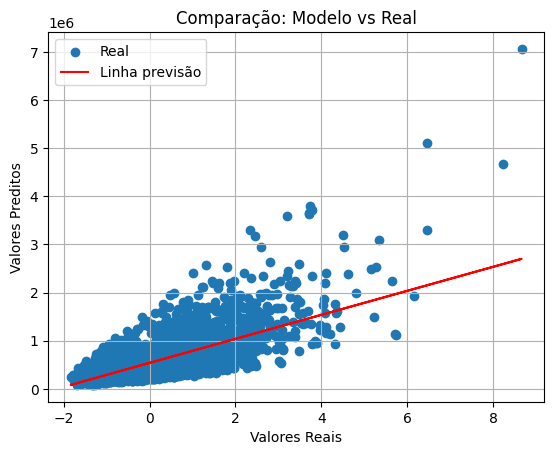

In [4]:
import matplotlib.pyplot as plt

# Plotar os valores reais e preditos

plt.scatter(x_teste,y_test_original, label="Real")
plt.plot(x_teste,y_pred_original,
         color='red', label='Linha previsão')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Comparação: Modelo vs Real")
plt.legend()
plt.grid()
plt.show()